In [1]:
import numpy as np 
import  pandas as pd
from data_loader import Christiano_Fitzgerald_filter, generate_wanted_matrix
from data_loader import load_data
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Thesis/03. Data/Final version data/Static.xlsx'
df_data = load_data(file_path)

In [3]:
df_data

,1995-01,1995-02,1995-03,1995-04,1995-05,1995-06,1995-07,1995-08,1995-09,1995-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
CPI_Australia,0.024124,0.028044,0.031274,0.034579,0.036988,0.039623,0.042071,0.044041,0.046081,0.047395,...,0.065820,0.063307,0.061996,0.058883,0.055770,0.052499,0.050439,0.048379,0.046171,0.043963
CPI_Canada,0.002320,0.013954,0.018562,0.020858,0.026637,0.026576,0.023069,0.024181,0.020738,0.024209,...,0.047232,0.036920,0.036057,0.029194,0.026462,0.026428,0.035407,0.038541,0.030101,0.029433
CPI_Denmark,0.021439,0.018790,0.021865,0.020748,0.019117,0.022160,0.022717,0.014463,0.014960,0.018500,...,0.063851,0.066867,0.048918,0.042560,0.020907,0.012970,0.030851,0.011106,-0.001702,0.009390
CPI_Germany,0.019024,0.015133,0.018857,0.017588,0.016301,0.015038,0.013759,0.013725,0.016240,0.017500,...,0.075388,0.063613,0.064941,0.060088,0.059231,0.057260,0.056204,0.041709,0.037185,0.035424
CPI_Japan,0.006263,0.006263,-0.002085,-0.005211,-0.003120,0.003123,0.007311,-0.003133,-0.005211,-0.003110,...,0.038953,0.028281,0.028171,0.031902,0.031902,0.027954,0.028793,0.026796,0.023822,0.030335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TBSR_Norway,0.054100,0.050200,0.049900,0.052200,0.055300,0.054000,0.053500,0.052200,0.055000,0.053000,...,0.031388,0.030310,0.032613,0.033689,0.037040,0.039107,0.039549,0.040166,0.040754,0.042031
TBSR_Sweden,0.078100,0.081900,0.087500,0.086800,0.087800,0.093700,0.091700,0.091100,0.088100,0.087470,...,0.031121,0.032070,0.032619,0.032797,0.035294,0.035958,0.037256,0.038647,0.039409,0.039802
TBSR_Switzerland,0.038750,0.037500,0.033750,0.033750,0.031410,0.030000,0.026090,0.027500,0.023590,0.019530,...,0.012419,0.012613,0.012657,0.014243,0.016576,0.016107,0.018496,0.018581,0.015123,0.015506
TBSR_United_Kingdom,0.061478,0.063185,0.060665,0.066785,0.061680,0.067043,0.067392,0.066885,0.066952,0.066331,...,0.040800,0.040800,0.044596,0.048047,0.053111,0.055125,0.055903,0.054580,0.054384,0.053984


In [4]:
matrix=df_data.to_numpy()

In [5]:
result= Christiano_Fitzgerald_filter(matrix, [2,192], adjust_level=False, generate_external_sides=[10,10])

In [6]:
result.keys()

dict_keys(['frequencies', 'component 0', 'provisional_matrix 0'])

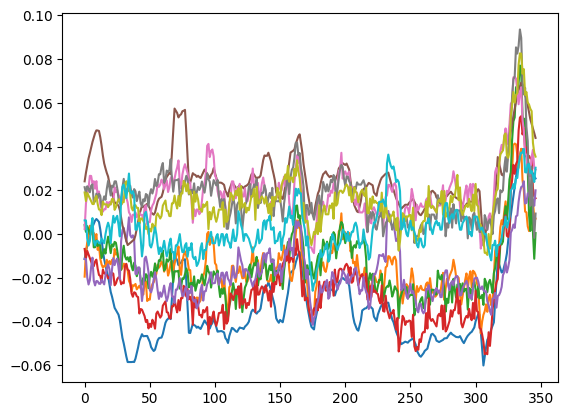

In [14]:
plt.plot(result["component 0"][:5,:].T)

# plt.plot(matrix[:5,:].T)

In [8]:
result["component 0"]

array([[-0.01142294, -0.00804397, -0.00535702, ...,  0.027582  ,
         0.02650457,  0.02543468],
       [-0.01944007, -0.00806585, -0.00371956, ...,  0.01507651,
         0.00718926,  0.00707939],
       [ 0.00412589,  0.00102146,  0.00364035, ...,  0.00087475,
        -0.01128012,  0.00047047],
       ...,
       [ 0.01386032,  0.01197947,  0.00759989, ...,  0.02681965,
         0.02424826,  0.02552177],
       [-0.00676642, -0.00641637, -0.01029205, ...,  0.04964978,
         0.05135607,  0.05286868],
       [-0.00362877, -0.00544023, -0.00724918, ...,  0.04714938,
         0.04949223,  0.05004521]])

In [9]:
new_df=pd.DataFrame(index=df_data.index, columns=df_data.columns, data=result["component 0"])

In [10]:
new_df

,1995-01,1995-02,1995-03,1995-04,1995-05,1995-06,1995-07,1995-08,1995-09,1995-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
CPI_Australia,-0.011423,-0.008044,-0.005357,-0.002599,-0.000737,0.001348,0.003244,0.004662,0.006148,0.006907,...,0.037353,0.035907,0.035673,0.033647,0.031630,0.029464,0.028519,0.027582,0.026505,0.025435
CPI_Canada,-0.019440,-0.008066,-0.003720,-0.001688,0.003824,0.003493,-0.000285,0.000552,-0.003166,0.000027,...,0.020085,0.010277,0.009928,0.003584,0.001378,0.001878,0.011397,0.015077,0.007189,0.007079
CPI_Denmark,0.004126,0.001021,0.003640,0.002067,-0.000021,0.002565,0.002664,-0.006046,-0.006005,-0.002922,...,0.049202,0.052831,0.035500,0.029767,0.008746,0.001447,0.019971,0.000875,-0.011280,0.000470
CPI_Germany,-0.006777,-0.011036,-0.007682,-0.009322,-0.010983,-0.012621,-0.014276,-0.014688,-0.012550,-0.011669,...,0.048477,0.037542,0.039720,0.035727,0.035738,0.034645,0.034477,0.020878,0.017257,0.016408
CPI_Japan,-0.011311,-0.011397,-0.019832,-0.023044,-0.021038,-0.014880,-0.010777,-0.021304,-0.023466,-0.021448,...,0.024144,0.013952,0.014327,0.018548,0.019041,0.015591,0.016932,0.015440,0.012975,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TBSR_Norway,-0.004085,-0.009246,-0.010806,-0.009764,-0.007920,-0.010473,-0.012222,-0.014768,-0.013209,-0.016445,...,0.017920,0.018456,0.022382,0.025093,0.030087,0.033806,0.035910,0.038195,0.040458,0.043417
TBSR_Sweden,0.016651,0.019116,0.023385,0.021360,0.021041,0.025628,0.022323,0.020425,0.016135,0.014223,...,0.026877,0.029765,0.032266,0.034408,0.038879,0.041528,0.044819,0.048214,0.050986,0.053398
TBSR_Switzerland,0.013860,0.011979,0.007600,0.006972,0.004006,0.001971,-0.002561,-0.001770,-0.006297,-0.010970,...,0.014578,0.015624,0.016528,0.018978,0.022179,0.022584,0.025852,0.026820,0.024248,0.025522
TBSR_United_Kingdom,-0.006766,-0.006416,-0.010292,-0.005526,-0.011981,-0.007966,-0.008961,-0.010809,-0.012076,-0.014027,...,0.022890,0.024703,0.030327,0.035620,0.042540,0.046422,0.049081,0.049650,0.051356,0.052869
